In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# 1. Es posible definir nodos y aristas
nodes = ['NumPy','SciPy']
edges = [(1, 0)]

In [55]:
# 2. Es posible chequear si, dado un conjunto de nodos y aristas. Una arista existe o no 
(1,0) in edges

True

In [56]:
# 3. No es eficiente realizar dicho proceso de busqueda en presencia de muchas aristas. Es preferible construir una matriz de adyacencia
adj_matrix = np.zeros((len(nodes), len(nodes)))

for i, j in edges:
    adj_matrix[i][j] = 1


print(adj_matrix)

[[0. 0.]
 [1. 0.]]


In [57]:
# 4. Un problema asociado al trabajo con Numpy es que no es facil resizear un array. No permite integrar nuevos elementos facilmente manteniendo los existentes. 
# Este tema para el análisis de grafos es clave. Por eso se utiliza una librerías especializada en grafos.

import networkx as nx

In [58]:
# 5. Utilización de networkx

# instancio un grafo dirigido con cero nodos y cero aristas
G = nx.DiGraph() 

# Agrego nodo
# la forma de agregar nodo es: agrego un lugar en la matriz de adjacencia con index 0
# agregado el nodo, le agrego un atributo key:value, para identificarlo
G.add_node(0)
G.nodes[0]['webpage'] = 'Numpy'


print(G.nodes[0])

{'webpage': 'Numpy'}


In [59]:
G.nodes()

NodeView((0,))

In [60]:
# otra forma de agregar nodos y referencias: directamente al crear el nodo

G = nx.DiGraph()
G.add_node(0, webpage = 'Numpy')
G.add_node(1, webpage = 'Scipy')

print(G.nodes(data = True))

[(0, {'webpage': 'Numpy'}), (1, {'webpage': 'Scipy'})]


In [61]:
# visualización de matriz de adjacencia
# filas:salen, cols: entran
nx.to_numpy_array(G)

array([[0., 0.],
       [0., 0.]])

In [62]:
# Agrego arista de Scipy a Numpy
G.add_edge(1,0)

print(nx.to_numpy_array(G))

[[0. 0.]
 [1. 0.]]


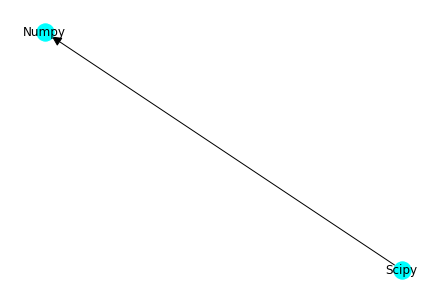

In [63]:
# 6. ploteo grafo
np.random.seed(0) # define la posición espacial de los nodos en los plot como random. Con esto la fijo.
labels = {i:G.nodes[i]['webpage'] for i in G.nodes}

nx.draw(G, labels = labels, node_color = 'cyan', arrowsize=20)
plt.show()

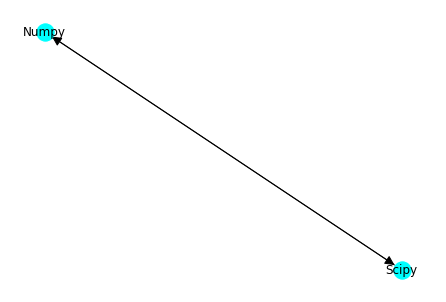

In [64]:
# 7. Defino relación bidireccional
np.random.seed(0)
G.add_edge(0,1)
nx.draw(G, labels = labels, node_color = 'cyan', arrowsize=20)
plt.show()

In [65]:
# 8. Agrego nodos a grafo ya creado
new = ['Pandas','Matplotlib']
new_nodes = [(i, {'webpage':webpage}) for i, webpage in enumerate(new,2)]
new_nodes

[(2, {'webpage': 'Pandas'}), (3, {'webpage': 'Matplotlib'})]

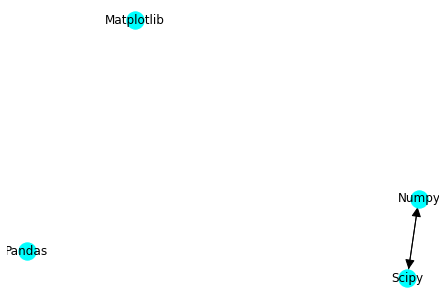

In [66]:
np.random.seed(0)
G.add_nodes_from(new_nodes) # este m´todo permite incluir nodos desde diccionario
labels = {i:G.nodes[i]['webpage'] for i in G.nodes}
nx.draw(G, labels = labels, node_color = 'cyan', arrowsize=20)
plt.show()

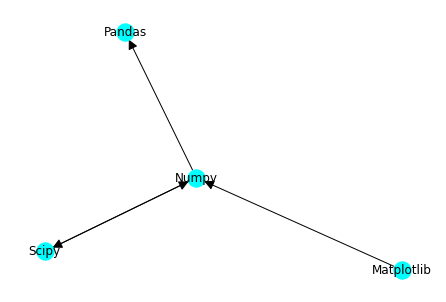

In [67]:
# 9. Agrego aristas múltiples desde lista
new_edges = [(0,2),(3,0)]
G.add_edges_from(new_edges)
nx.draw(G, labels = labels, node_color = 'cyan', arrowsize=20)
plt.show()

In [69]:
# 10. Calculo in-degree metric
# in-degree: métrica de un nodo. Cantidad de aristas que llegan a un nodo.
# out-degree: métrica de un nodo. Cantida de aristas que salen de un nodo.

print(nx.to_numpy_array(G))
print(G.nodes(data = True))

[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[(0, {'webpage': 'Numpy'}), (1, {'webpage': 'Scipy'}), (2, {'webpage': 'Pandas'}), (3, {'webpage': 'Matplotlib'})]


In [91]:
list_labels = [G.nodes(data = True)[i]['webpage'] for i in range(len(G.nodes))]

adj_matrix = nx.to_numpy_array(G)
list_in_degree = adj_matrix.sum(axis = 0)
list_out_degree = adj_matrix.sum(axis = 1)

# in-degree
dict(zip(list_labels,list_in_degree))

{'Numpy': 2.0, 'Scipy': 1.0, 'Pandas': 1.0, 'Matplotlib': 0.0}

In [92]:
dict(zip(list_labels, list_out_degree))

{'Numpy': 2.0, 'Scipy': 1.0, 'Pandas': 0.0, 'Matplotlib': 1.0}

In [97]:
# se puede utilizar el método in-degree de la librería
#G.in_degree(0)
dict(zip(list_labels, [G.in_degree(i) for i in G.nodes()]))

{'Numpy': 2, 'Scipy': 1, 'Pandas': 1, 'Matplotlib': 0}

In [99]:
# 11. Definiendo un grafo no direccionado
G = nx.Graph() # esto define un grafo no direccionado
G.add_edge(0,1)
G[0][1]['travel_time'] = 20 # defino así un atributo específico de esta arista, el tiempo de viaje


In [104]:
G[0][1]['trave']

AtlasView({1: {'travel_time': 20}})

In [105]:
# Continuar construyendo un grafo posta en 467(495)